<a href="https://colab.research.google.com/github/gshah8/UCF/blob/master/Machine_Learning/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 1 

This homework will get you up to speed with Python programming, numpy, matplotlib, Keras, gradients, partial derivatives, git, GitHub, Google's colaboratory etc. Have fun!

For this homework, you will create neural networks with an input layer and an output layer without any hidden layers. The connections are dense: each input neuron is connected to each output neuron.

Instructions for problems 1 and 2:
- Load the training and test data using Keras, no validation set needed.
- Train 10 classifiers that perform binary classification: *Is the input image the digit i or is it a digit different from i?* Each of the ten classifiers has an input layer consisting of 28 x 28 input neurons and an output layer consisting of a single output neuron.
- Implement mini-batch stochastic gradient descent using only numpy, that is, you are not allowed to use TensorFlow/Keras for SGD.
- Use ```argmax``` to determine the classifier with the strongest output and declare the corresponding digit as output.

## Problem 1
Use logistic regression with mean squared error loss.

## Problem 2
Use logistic regression with binary cross entropy loss.

## Problem 3
- Load the training and test data using Keras, no validation set needed.
- Create network with an input layer consisting of 28 x 28 input neurons and an output layer consisting of 10 output neurons.
- Use softmax and categorical cross entropy loss.
- Implement mini-batch stochastic gradient descent using only numpy, that is, you are not allowed to use TensorFlow/Keras for SGD.

In [1]:
#Load data
import numpy as np
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


In [0]:
#for reshaping and normalizing train and test images
m = 60000
n = 10000
image_size = 28*28
train_images = train_images_original.reshape((m, image_size))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((n, image_size))
test_images = test_images.astype('float32') / 255

In [0]:
#for adding bias to train and test images
train_images_b = np.c_[np.ones((m, 1)), train_images]
test_images_b = np.c_[np.ones((n, 1)), test_images]

In [0]:
#for adding bias to train and test labels. Doing something like one-hot encoding for labels
train_labels = np.zeros((m,10))
test_labels = np.zeros((n,10))

for i in range(m):
  train_labels[i][train_labels_original[i]] = 1
  
for i in range(n):
  test_labels[i][test_labels_original[i]] = 1

In [0]:
#for setting weight

np.random.seed(42)
weight = np.random.randn(image_size+1,10)
weight_path_mgd = []
batch_size = 64

In [8]:
#this is for linear regression. Change it for logistic regression

epochs = 10
lr = 0.01

weight_path_mgd.append(weight)
for epoch in range(epochs):
    #shuffled_indices = np.random.permutation(m)
    #X_b_shuffled = X_b[shuffled_indices]
    #y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
      train_images_b_i = train_images_b[i:i+batch_size]
      train_labels_b_i = train_labels[i:i+batch_size]
      z = train_images_b_i.dot(weight)

      #apply activation - softmax
      z_exp = np.exp(z)
      z_exp_sum = z_exp.sum(axis=1)
      a = np.zeros((64,10))
      for j in range(len(z)):
        a[j] = z_exp[j] / z_exp_sum[j]
      
        
        
        
        
      #break
    #break
    
        #a = np.zeros((10,1))
        #for j in range(len(z)):
        #  a[j] = np.exp(z)

#print(z_exp_sum)
#print(z[0][0])
#print(z_exp[0][0])
#print(len(z))
#print(a)

#sum_arr = np.zeros((64,1))
#sum_arr = a.sum(axis=1)
#print(sum_arr)


        #gradient = 2/batch_size * xi.T.dot(xi.dot(weight) - yi)
        #weight = weight - lr * gradient
        #weight_path_mgd.append(weight)

[[9.99992201e-01 5.30172558e-11 2.41170207e-06 2.14447085e-11
  2.39798306e-10 3.70428084e-08 1.41400059e-15 3.01990027e-11
  7.91065792e-17 5.35027395e-06]
 [4.02995514e-04 4.58881522e-02 9.51491574e-01 2.67192153e-07
  6.78366206e-11 7.46094154e-09 4.55328231e-10 1.01166581e-10
  2.06117659e-08 2.21698239e-03]
 [2.71613730e-01 9.56631419e-08 5.63826689e-01 6.42513409e-03
  7.71115061e-02 7.18447203e-04 1.61696653e-06 5.30817509e-02
  8.25035451e-03 1.89706759e-02]
 [6.22299128e-01 5.37468911e-02 1.38830147e-02 1.76592469e-01
  9.88270343e-02 3.22403113e-02 2.13800578e-05 1.19818529e-05
  2.32149578e-03 5.62945799e-05]
 [1.85395283e-01 2.81678790e-03 1.29102175e-05 8.02920092e-01
  7.14655929e-10 8.72610938e-03 4.31483160e-09 1.01341914e-04
  6.29428334e-09 2.74635511e-05]
 [1.72445802e-05 6.33220959e-04 1.68088807e-01 5.21259437e-04
  8.82969252e-02 1.08164312e-03 4.62139927e-06 1.58683774e-01
  4.39510399e-16 5.82672504e-01]
 [6.76709756e-04 1.72366859e-08 2.04207203e-05 9.99202460e

In [0]:
#Loss 

## Problem 4
Reimplement the network from Problem 3 entirely in Keras.

In [0]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
#train_images_original.shape

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)
#test_labels

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(28*28, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:
epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/step - loss: 1.0802 - acc: 0.7649 - val_loss: 0.5847 - val_acc: 0.8721
Epoch 2/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.5120 - acc: 0.8757 - val_loss: 0.4235 - val_acc: 0.8937
Epoch 3/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.4133 - acc: 0.8913 - val_loss: 0.3665 - val_acc: 0.9042
Epoch 4/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.3685 - acc: 0.9001 - val_loss: 0.3339 - val_acc: 0.9108
Epoch 5/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.3409 - acc: 0.9068 - val_loss: 0.3136 - val_acc: 0.9148
Epoch 6/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3212 - acc: 0.9115 - val_loss: 0.2977 - val_acc: 0.9185
Epoch 7/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.3059 - acc: 0.9157 - val_loss: 0.2852 - val_acc

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

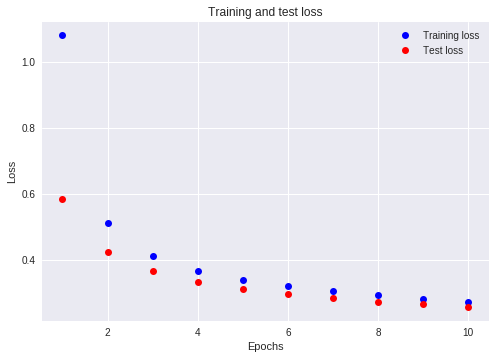

In [0]:
import matplotlib.pyplot as plt
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 65us/step
Test accuracy: 0.9285


## Problem 5
Extend the network from Problem 4 by adding new features.
- Round the grey values of the images to 1 and 0 so you obtain black and white images. Add as an additional feature the number of white regions. For instance, a typical 0 has 2 white regions and 8 has 3. Use the following neighborhoods for pixels:

```
pixel x,y (indicated by .) is connected to its neighbors (indicated by o):

 o
o.o  
 o
 
ooo
o.o
ooo
```
- Consider the width.
- Consider the height.
- Come up with other features.

You should normalize your new features so that they are at the same scale as the pixel values (between 0 and 1).